<a href="https://colab.research.google.com/github/muryulia/Yandex.Practicum-Projects/blob/main/02_loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование надежности заемщиков

# Содержание

[1. Обзор данных](#scrollTo=47acd530)


[2. Предобработка данных](#scrollTo=38497889)

- [2.1 Заполнение пропусков](#scrollTo=f61GMrIm0hIx)

- [2.2 Проверка данных на аномалии и исправления](#scrollTo=87d6194e)

- [2.3 Изменение типов данных](#scrollTo=fe6c41f8)

- [2.4 Удаление дубликатов](#scrollTo=6a4b4e72)

- [2.5 Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма](#scrollTo=559d77a6)

- [2.6 Категоризация дохода](#scrollTo=190f2ad3)

- [2.7 Категоризация целей кредита](#scrollTo=32548286)


[3. Ответы на вопросы](#scrollTo=36827454)

- [Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?](#scrollTo=92e93ac6)

- [Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?](#scrollTo=ea973c4c)

- [Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#scrollTo=bbe573d2)

- [Вопрос 4: Как уровень образования влияет на возврат кредита в срок?](#scrollTo=hzbPoewbp18a)

- [Вопрос 5: Как разные цели кредита влияют на его возврат в срок?](#scrollTo=5da9d123)


[4. Общий вывод](#scrollTo=1bbf9003)

Цель исследования: используя данные банка о платежеспособности заемщиков, определить, влияют ли на погашение кредита в срок такие факторы как семейное положение, количество детей, уровень дохода и цель кредита.

Для исследования предоставлен файл в формате .csv. 

Описание данных:

- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

## 1. Обзор данных

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (21,7)
plt.rcParams['grid.alpha'] = 0
plt.style.use('seaborn-talk')

pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Посмотрим на данные. Сначала прочитаем файл
data = pd.read_csv('/datasets/data.csv')

# Выведем на экран первые 5 строк файла
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.67,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.64,покупка жилья
1,1,-4024.80,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01,приобретение автомобиля
2,0,-5623.42,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.95,покупка жилья
3,3,-4124.75,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55,дополнительное образование
4,0,340266.07,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.08,сыграть свадьбу


In [3]:
# Получим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
# Оценим общую структуру датафрейма
data.shape

(21525, 12)

In [5]:
# Также посмотрим на общее описание данных, чтобы оценить разброс значений, максимум, минимум, среднее и медиану
data.describe().T

,count,mean,std,min,25%,50%,75%,max
children,21525.00,0.54,1.38,-1.00,0.00,0.00,1.00,20.00
days_employed,19351.00,63046.50,140827.31,-18388.95,-2747.42,-1203.37,-291.10,401755.40
dob_years,21525.00,43.29,12.57,0.00,33.00,42.00,53.00,75.00
education_id,21525.00,0.82,0.55,0.00,1.00,1.00,1.00,4.00
family_status_id,21525.00,0.97,1.42,0.00,0.00,0.00,1.00,4.00
debt,21525.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00
total_income,19351.00,167422.30,102971.57,20667.26,103053.15,145017.94,203435.07,2265604.03


Датафрейм состоит из 12 столбцов и 21525 строк. 

2 столбца относятся к типу float64, 5 столбцов - к типу int64, 5 столбцов - к типу object. 

В столбцах `days_employed` и `total_income` количество строк меньше, чем в других столбцах.

## 2. Предобработка данных

### 2.1 Заполнение пропусков



Заполнение пропусков начнем с того, что найдем столбцы с пропущенными значениями.

In [6]:
# Применим метод isna() к датафрейму для подсчета общего количества пропущенных значений,
# сложим их методом sum(), посчитаем долю методом mean, транспонируем и выведем результат

(data.isna()
.agg(['sum', 'mean'])
.T.rename(columns={'sum': 'NaN_count', 'mean': 'NaN_part'})
.style.format({'NaN_part': '{:,.2%}'.format})
.background_gradient(cmap='inferno_r', axis=0))

,NaN_count,NaN_part
children,0.000000,0.00%
days_employed,2174.000000,10.10%
dob_years,0.000000,0.00%
education,0.000000,0.00%
education_id,0.000000,0.00%
family_status,0.000000,0.00%
family_status_id,0.000000,0.00%
gender,0.000000,0.00%
income_type,0.000000,0.00%
debt,0.000000,0.00%


Мы видим, что в столбцах `days_employed` и `total_income` 10% значений пропущено, а также, что количество пропущенных значений одинаковое в каждом столбце.

Посмотрим, как выглядят строки с пропусками. Методом `isna()` найдём все строки с пропусками и просмотрим первые пять строк.

In [7]:
display(data[data['days_employed'].isna()].head())

# И еще раз подсчитаем количество пропусков - теперь уже для двух столбцов - чтобы проверить, что данные пропущены в одних и тех же строках

print(f'Количество пропусков:', data[['days_employed', 'total_income']].isna().sum(), sep='\n')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Количество пропусков:
days_employed    2174
total_income     2174
dtype: int64


Пропуски в столбцах имеют вид `NaN`, т.е. пропущенных числовых значений. 

Данные в столбцах `days_employed` и `total_income` пропущены в одних и тех же строках.

Попробуем установить причину пропусков в данных. Для этого сгуппируем данные по столбцу `income_type`, посчитаем общее количество записей, количество пропусков и долю пропусков. 

In [8]:
# Посчитаем количество клиентов по типу дохода
count_occupation = data.groupby('income_type')['income_type'].count().to_frame().rename(columns={'income_type': 'have_income'})

# Посчитаем количество пропусков 
count_occupation['empty_income'] = data.groupby('income_type')['total_income'].apply(lambda x: x.isna().sum())

#Посчитаем, какую долю составляют клиенты с пропусками в ячейках с доходом
count_occupation['empty_part'] =  count_occupation['empty_income'] / count_occupation['have_income']

In [9]:
count_occupation.style.format({'empty_part': '{:.2%}'}).background_gradient(cmap='inferno_r', axis=0)

,have_income,empty_income,empty_part
income_type,,,
безработный,2,0,0.00%
в декрете,1,0,0.00%
госслужащий,1459,147,10.08%
компаньон,5085,508,9.99%
пенсионер,3856,413,10.71%
предприниматель,2,1,50.00%
сотрудник,11119,1105,9.94%
студент,1,0,0.00%


Из полученной таблицы можно сделать вывод, что пропущенные значения встречаются независимо от типа дохода клиента и наличия дохода вообще. Вероятно, часть клиентов не сообщают информацию о своем доходе и трудовом стаже при получении кредита. Такие пропуски можно отнести к **неслучайным**.

Прежде чем работать с данными дальше, нужно заполнить пропуски. 

Данные в столбцах `days_employed` и `total_income` относятся к вещественному типу, пропуски можно заполнить средним или медианным значением.

Оценим разброс данных в каждом столбце. Для этого сравним среднее и медианное значения.

In [10]:
data.agg({'days_employed': ['mean', 'median'],'total_income': ['mean', 'median']})

,days_employed,total_income
mean,63046.50,167422.30
median,-1203.37,145017.94


Среднее и медианное значения отличаются. В этом случае лучше заполнять пропуски медианным значением, т.к. среднее значение может быть смещено из-за разброса в данных.

Кроме того, мы видим, что медианное значение дней трудового стажа получилось отрицательным. 
В действительности количество дней не может быть отрицательной величиной и скорее всего, с данными в столбце что-то не так. Поэтому заполнение дней трудового стажа отрицательным значением не представляется правильным решением. 

Посчитаем, сколько таких значений в таблице.

In [11]:
data[data['days_employed'] < 0]['days_employed'].count()

15906

Больше половины значений в столбце days_employed - отрицательные.

Заменим отрицательные значения на положительные. Посмотрим, как выглядит таблица.

In [12]:
data['days_employed'] = abs(data['days_employed'])

data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.67,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.64,покупка жилья
1,1,4024.80,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01,приобретение автомобиля
2,0,5623.42,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.95,покупка жилья
3,3,4124.75,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55,дополнительное образование
4,0,340266.07,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.08,сыграть свадьбу


Некоторые значения выглядят неправдоподобно высокими. Попробуем перевести дни в года и посмотреть, какие значения встречаются чаще всего.

In [13]:
#Чтобы не выводить все значения, разобьем данные на 5 корзин и посмотрим на значения по ним
pd.cut(round(data['days_employed'] / 365), bins=5).value_counts()

(-1.101, 220.2]    15906
(880.8, 1101.0]     3445
(220.2, 440.4]         0
(440.4, 660.6]         0
(660.6, 880.8]         0
Name: days_employed, dtype: int64

Результаты впечатляют: у банка есть 3445 клиентов со стажем от 880 до 1100 лет!

Предположим, что аномально высокие значения могли появиться в результате ошибки. Например, вместо стажа в днях был указан стаж в часах. Проверим это предположение, разделив стаж в годах на 24 и посмотрим, какие значения получаются.

In [14]:
round((data['days_employed'] / 365 / 24)).value_counts()

0.00     13591
1.00      2267
39.00      429
42.00      428
45.00      425
43.00      422
40.00      414
41.00      410
38.00      397
44.00      377
46.00      143
2.00        48
Name: days_employed, dtype: int64

Теперь значения стажа не превышают 46 лет - такие значения выглядят правдоподобно. Посмотрим, как распределяется возраст клиентов с таким стажем.

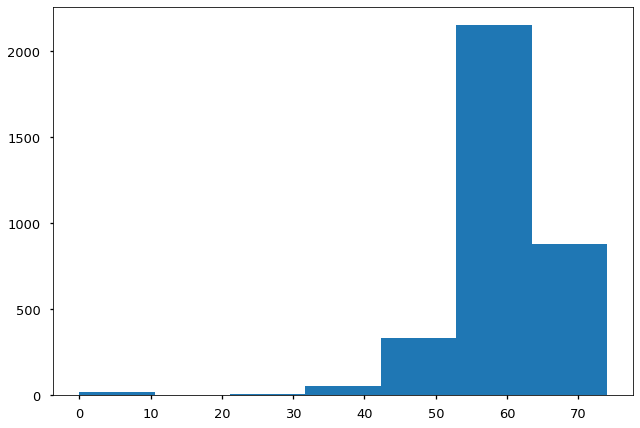

In [15]:
# Выбираем значения возраста клиентов, у которых стаж больше 37 лет
data[round(data['days_employed'] / 365 / 24) > 37]['dob_years'].hist(bins=7)
plt.show()

Как видим на гистограмме, основную массу клиентов со стажем более 37 лет составляют клиенты в возрасте 55 - 60 лет, что вполне правдоподбно. К сожалению, встречаются и клиенты, возраст которых меньше 37 лет, а стаж от 37 лет и больше. Посмотрим на долю таких клиентов.

In [16]:
# Число клиентов с возрастом 50 и менее лет делим на общее число клиентов со стажем 37+ лет
abnormal_users = round((data[(round(data['days_employed'] / 365 / 24) > 37) & (data['dob_years'] <=50)]['dob_years'].value_counts().sum() 
 / data[(round(data['days_employed'] / 365 / 24) > 37)]['dob_years'].value_counts().sum())*100, 1)

print(f'Доля клиентов моложе 37 лет со стажем 37 и более лет составляет {abnormal_users}%.')

Доля клиентов моложе 37 лет со стажем 37 и более лет составляет 7.1%.


Общая доля клиентов, у которых стаж более 37 лет и возраст 22 - 50 лет, составляет 7.1% от общего числа клиентов, у которых обнаружен аномально большой стаж. 

Мы не можем быть уверены в том, что аномально большие значения стажа - это значения стажа в часах. Представляется нецелесообразным дальнейшее изучение аномалии в данном столбце, потому что данные из столбца не потребуется для дальнейшего исследования. 

Поэтому будем считать, что аномальные значения стажа в днях - это значения стажа в часах. Переведем стаж в часах в стаж в днях и заменим значения в столбце со стажем. 

In [17]:
data.loc[data['days_employed'] / 365 / 24 > 37, 'days_employed'] = data['days_employed'] / 365 / 24

(-0.05, 10.0]    16445
(10.0, 20.0]      2196
(20.0, 30.0]       548
(30.0, 40.0]       148
(40.0, 50.0]        14
Name: days_employed, dtype: int64

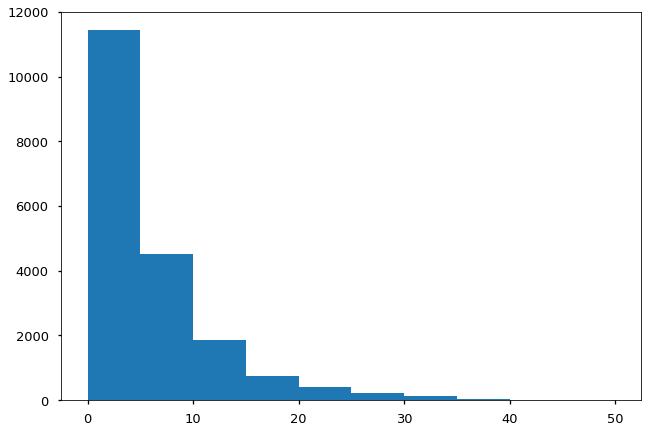

In [18]:
# Проверим, как выглядят значения в столбце после замены стажа в часах на стаж в днях. Будем отображать стаж в годах, округленный до целых значений
display(pd.cut(round(data['days_employed'] / 365), bins=5).value_counts())
round(data['days_employed'] / 365).hist()
plt.show()

Мы избавились от аномально высоких значений стажа: теперь стаж не превышает 50 лет. С учетом того, что максимальный возраст клиентов 75 лет, такие значения стажа выглядят правдоподобными.

Теперь мы можем заменить пропуски в столбцах `total_income` и `days_employed` медианным значением.
Возьмем медианное значение, рассчитанное для группы клиентов: для столбца `total_income` заполним медианными значениями, сгруппированными по по типу занятости, а для столбца `days_employed` - медианными значениями, сгруппированными по возрасту клиентов.

In [19]:
data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform("median"))
data['days_employed'] = data['days_employed'].fillna(data.groupby('dob_years')['days_employed'].transform("median"))

# Считаем пропуски после заполнения медианными значениями
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Пропуски заполнены, переходим к поиску аномалий!

### 2.2 Проверка данных на аномалии и исправления

Аномалии в столбце `days_employed` мы изучили и обработали в предыдущем разделе исследования.

Посмотрим, как распределены значения в остальных столбцах, и есть ли в них аномалии.
Будем рассчитывать абсолютное значение признака и его долю в процентах.

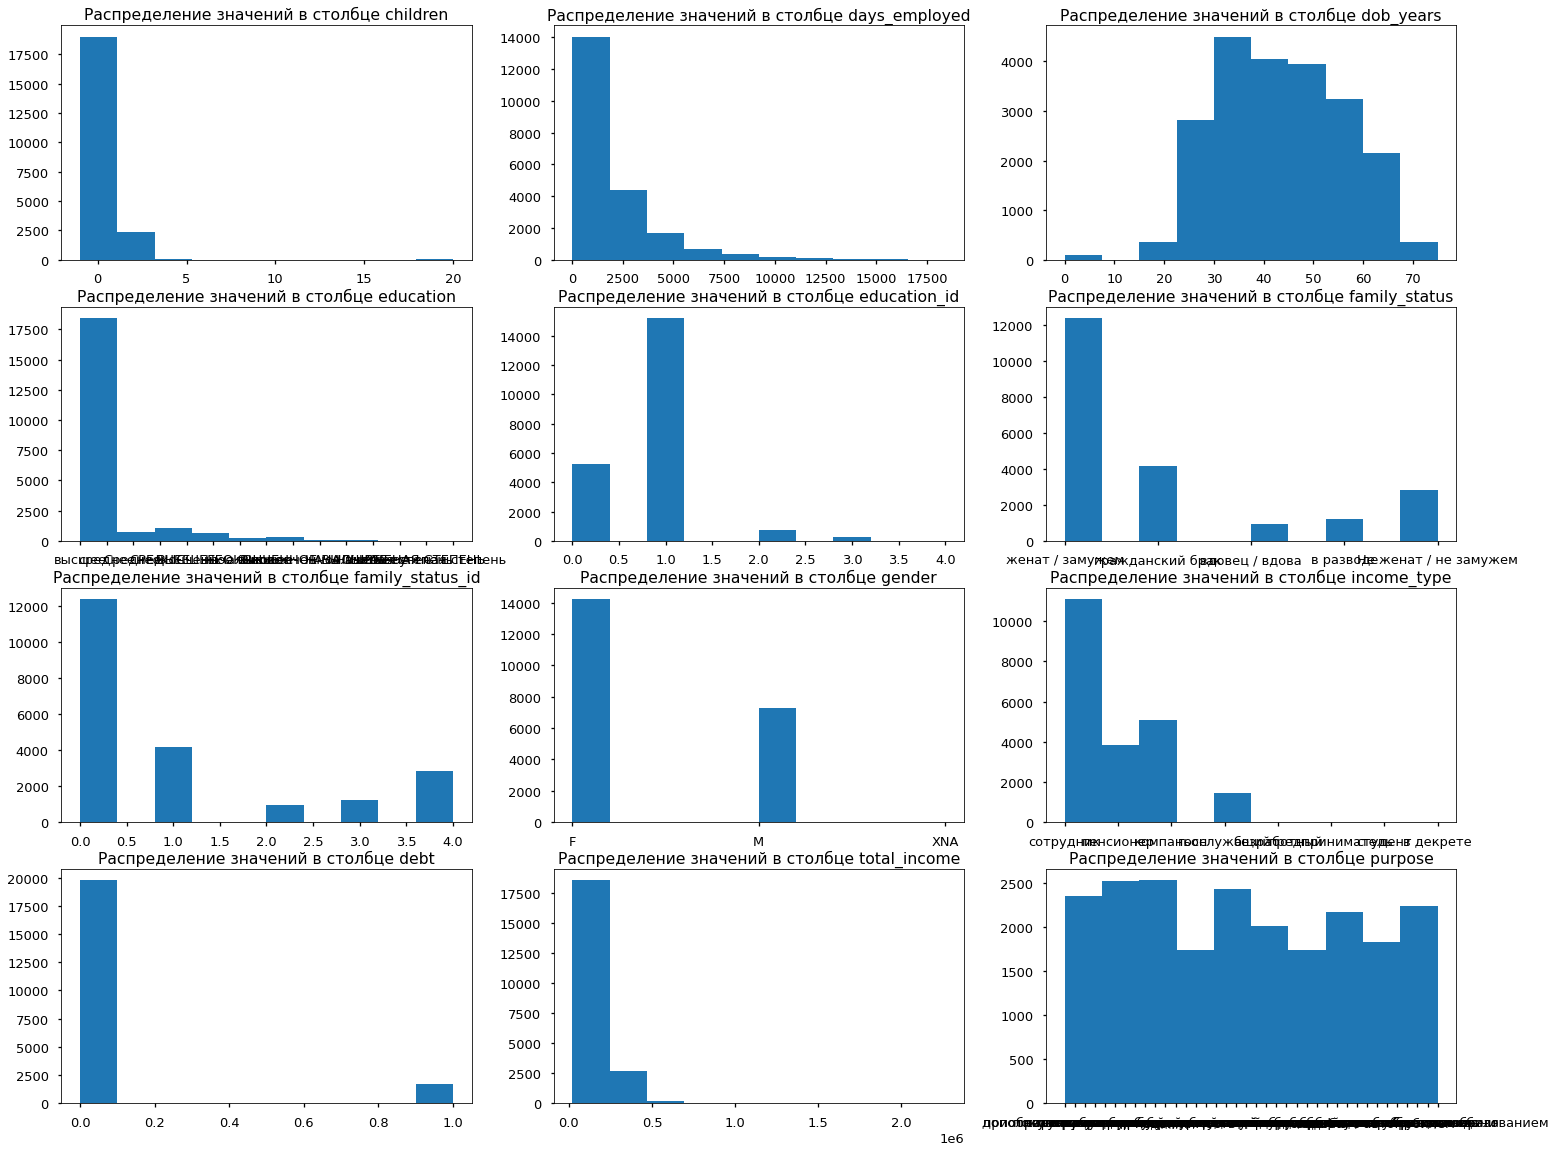

In [20]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(data.columns.to_list()):
    try:
        plt.subplot(5, 3, i + 1)
        plt.title('Распределение значений в столбце ' + col)
        data[col].hist()
    except:
        print('Проверьте значения аргументов df и row')

In [21]:
for col in ['children', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt', 'purpose']:
    try:
        print(f'\033[1mРаспределение значений в столбце {col}\033[0m')
        display(pd.concat([data[col].value_counts(), data[col].value_counts(normalize=True)], 
                          axis=1, keys=['total_count', 'percentage']).style.format({'percentage': '{:.1%}'})
.background_gradient(subset='percentage', cmap='inferno_r', axis=0))
    except:
        print('Проверьте значения аргументов df и row')

Распределение значений в столбце children


,total_count,percentage
0,14149,65.7%
1,4818,22.4%
2,2055,9.5%
3,330,1.5%
20,76,0.4%
-1,47,0.2%
4,41,0.2%
5,9,0.0%


Распределение значений в столбце dob_years


,total_count,percentage
35,617,2.9%
40,609,2.8%
41,607,2.8%
34,603,2.8%
38,598,2.8%
42,597,2.8%
33,581,2.7%
39,573,2.7%
31,560,2.6%
36,555,2.6%


Распределение значений в столбце education


,total_count,percentage
среднее,13750,63.9%
высшее,4718,21.9%
СРЕДНЕЕ,772,3.6%
Среднее,711,3.3%
неоконченное высшее,668,3.1%
ВЫСШЕЕ,274,1.3%
Высшее,268,1.2%
начальное,250,1.2%
Неоконченное высшее,47,0.2%
НЕОКОНЧЕННОЕ ВЫСШЕЕ,29,0.1%


Распределение значений в столбце education_id


,total_count,percentage
1,15233,70.8%
0,5260,24.4%
2,744,3.5%
3,282,1.3%
4,6,0.0%


Распределение значений в столбце family_status


,total_count,percentage
женат / замужем,12380,57.5%
гражданский брак,4177,19.4%
Не женат / не замужем,2813,13.1%
в разводе,1195,5.6%
вдовец / вдова,960,4.5%


Распределение значений в столбце family_status_id


,total_count,percentage
0,12380,57.5%
1,4177,19.4%
4,2813,13.1%
3,1195,5.6%
2,960,4.5%


Распределение значений в столбце gender


,total_count,percentage
F,14236,66.1%
M,7288,33.9%
XNA,1,0.0%


Распределение значений в столбце income_type


,total_count,percentage
сотрудник,11119,51.7%
компаньон,5085,23.6%
пенсионер,3856,17.9%
госслужащий,1459,6.8%
безработный,2,0.0%
предприниматель,2,0.0%
студент,1,0.0%
в декрете,1,0.0%


Распределение значений в столбце debt


,total_count,percentage
0,19784,91.9%
1,1741,8.1%


Распределение значений в столбце purpose


,total_count,percentage
свадьба,797,3.7%
на проведение свадьбы,777,3.6%
сыграть свадьбу,774,3.6%
операции с недвижимостью,676,3.1%
покупка коммерческой недвижимости,664,3.1%
покупка жилья для сдачи,653,3.0%
операции с жильем,653,3.0%
операции с коммерческой недвижимостью,651,3.0%
покупка жилья,647,3.0%
жилье,647,3.0%


In [22]:
#Также посмотрим на распределение данных по возрасту и типу дохода "пенсионер", потому что этот статус подразумевает достижение определенного возраста
pd.cut(data.query('income_type == "пенсионер"')['dob_years'], bins=7).value_counts()

(52.857, 63.429]    2419
(63.429, 74.0]       978
(42.286, 52.857]     369
(31.714, 42.286]      61
(-0.074, 10.571]      20
(21.143, 31.714]       9
(10.571, 21.143]       0
Name: dob_years, dtype: int64

Мы выявили следующие аномалии в данных:

- значения -1 и 20 в столбце `children`. Причем значение 20 встречается 76 раз, что значительно больше, чем значение 5. Здравый смысл говорит, что в наше время семьи с 20 детьми встречаются гораздо реже, чем семьи с 5 детьми;

- значение 0 в столбце `dob_years` - встречается 101 раз;

- значений в столбце `education` больше, чем в столбце `education_id`;

- разное форматирование в столбце `family_status`: все значения записаны строчными буквами, значение "Не женат / не замужем" начинается с заглавной буквы;

- значение XNA в столбце `gender` - встречается 1 раз;

- несоответствие возраста в столбце `dob_years` и типа занятости в столбце `income_type`: 70 пенсионеров в возрасте 21 - 42 года.

Прежде чем устранять аномалии, оценим, какие из них могут повлиять на результаты нашего исследования.

В исследовании необходимо ответить на вопросы:

Есть ли зависимость между количеством детей и возвратом кредита в срок?

Есть ли зависимость между семейным положением и возвратом кредита в срок?

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Как разные цели кредита влияют на его возврат в срок?

Таким образом, из найденных аномалий только количество детей имеет значение для исследования. Поэтому эту аномалию необходимо устранить.

Можно поступить по-разному:

- удалить строки с аномальными значениями - они составляют меньше 1% от выборки;

- заменить аномальные значения на другие, например, на медианное значение либо на моду - в данном случае оба значения равны 0;

- исправить значения в соответствии со здравым смыслом.

Поскольку доля ячеек со значениями 20 и -1 в столбце `children` составляет менее 1% значений от общего числа строк, удаление этих строк не сильно повлияет на результаты анализа. Поэтому удалим строки со значениями 20 и -1 в столбце `children`.

In [23]:
# Удалим строки, в которых значения в столбце `children` равны 20 и -1
data = data.drop(data[(data['children'] == 20) | (data['children'] == -1)].index)

# Проверим значения в столбце 'children'
data['children'].value_counts()

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

Дубликаты в столбце `education` будут удалены на одном из следубщих шагов.

Устраним ошибку с регистром в столбце `family_status`, т.к. этот столбец будет использоваться в следующем шаге.

In [24]:
# Приведем значения в столбце к нижнему регистру
data['family_status'] = data['family_status'].str.lower()

# Посмотрим на значения в столбце
data['family_status'].value_counts()

женат / замужем          12302
гражданский брак          4160
не женат / не замужем     2799
в разводе                 1189
вдовец / вдова             952
Name: family_status, dtype: int64

Удалим строку с неизвестным полом в столбце `gender`.

In [25]:
data.drop(data[(data['gender'] == 'XNA')].index, inplace=True)
data['gender'].value_counts()

F    14154
M     7247
Name: gender, dtype: int64

Удалим записи, где в столбце `dob_years` возраст клиента равен 0 лет.

In [26]:
data.drop(data[(data['dob_years'] == 0)].index, inplace=True)
data[(data['dob_years'] == 0)]['dob_years'].count()

0

Аномалии в других столбцах не влияют на результаты исследования, поэтому их устранять на данном этапе не будем.

### 2.3 Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`. Также заменим типы данных в некоторых столбцах с int64 на int8.

In [27]:
data = data.astype({
    'children': 'int8', 
    'dob_years': 'int8', 
    'education_id': 'int8', 
    'family_status_id': 'int8', 
    'debt': 'int8', 
    'total_income': 'int32'})

# Проверим тип данных в таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21301 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21301 non-null  int8   
 1   days_employed     21301 non-null  float64
 2   dob_years         21301 non-null  int8   
 3   education         21301 non-null  object 
 4   education_id      21301 non-null  int8   
 5   family_status     21301 non-null  object 
 6   family_status_id  21301 non-null  int8   
 7   gender            21301 non-null  object 
 8   income_type       21301 non-null  object 
 9   debt              21301 non-null  int8   
 10  total_income      21301 non-null  int32  
 11  purpose           21301 non-null  object 
dtypes: float64(1), int32(1), int8(5), object(5)
memory usage: 1.3+ MB


Типы данных изменены.

### 2.4 Удаление дубликатов

Мы обнаружили дубликаты в столбце `education`, вызванные различным форматированием строк. Приведем все строки в столбце к нижнему регистру при помощи метода `str.lower()`.

In [28]:
data['education'] = data['education'].str.lower()
# Проверим столбец на дубликаты
data['education'].value_counts()

среднее                15073
высшее                  5202
неоконченное высшее      738
начальное                282
ученая степень             6
Name: education, dtype: int64

Проверим, остались ли еще дубликаты.

In [29]:
data.duplicated().sum()

71

Удалим дубликаты и пересчитаем их количество.

In [30]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

Дубликаты устранены.

In [31]:
#Проверим информацию о текущем размере датафрейма
data.shape

(21230, 12)

### 2.5 Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма

Создадим два новых датафрейма со столбцами:
1. `education_id` и `education`;
2. `family_status_id` и `family_status`.

In [32]:
# Создаем новые датафреймы
education_dict = data[['education_id','education']]
family_dict = data[['family_status_id','family_status']]

# Удалим дубликаты и сбросим индексы
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
family_dict = family_dict.drop_duplicates().reset_index(drop=True)

In [33]:
# Проверим, как выглядят новые датафреймы
display(education_dict)
display(family_dict)

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


Из исходного датафрейма удалим столбцы `education` и `family_status`, оставив только их идентификаторы: `education_id` и `family_status_id`.

In [34]:
#data = data[['children', 'days_employed', 'dob_years', 'education_id', 'family_status_id', 
             #'gender', 'income_type', 'debt', 'total_income', 'purpose']]

data.drop(columns=['education', 'family_status'], inplace=True)

# Сбросим индексы
data = data.reset_index(drop=True)

# Посмотрим, что получилось
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.67,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.80,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.42,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.75,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,38.84,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


In [35]:
# Получим информацию о каждом датафрейме
display(data.shape)
display(education_dict.shape)
display(family_dict.shape)

(21230, 10)

(5, 2)

(5, 2)

Декомпозиция датафрейма завершена!

### 2.6 Категоризация дохода

Добавим несколько категорий дохода на основании диапазонов, указанных ниже:
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

Для этого напишем функцию, которая на вход принимает значение дохода, а на выходе присваивает категорию в зависимости от указанного дохода.

In [36]:
def income_group(income):
   
    if income <= 30000:
        return 'E'
    if income <= 50000:
        return 'D'
    if income <= 200000:
        return 'C'
    if income <= 1000000:
        return 'B'
    return 'A' 

Создадим столбец `total_income_category` и применим к нему функцию `income_group()`.

In [37]:
data['total_income_category'] = data['total_income'].apply(income_group)

# Посмотрим, что получилось
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.67,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.80,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.42,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.75,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,38.84,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


In [38]:
# Также проверим распредление значений по категориям
data['total_income_category'].value_counts()

C    15849
B     4987
D      347
A       25
E       22
Name: total_income_category, dtype: int64

### 2.7 Категоризация целей кредита

В зависимости от цели получения кредита создадим следующие категории:

- 'операции с автомобилем',
- 'операции с недвижимостью',
- 'проведение свадьбы',
- 'получение образования'.

Для этого напишем функцию, которая на основании данных из столбца purpose сформирует новый столбец `purpose_category` с категорией кредита.

In [39]:
def purpose_category(purpose):
    
    if 'авто' in purpose:
        return 'операции с автомобилем'
    if 'свад' in purpose:
        return 'проведение свадьбы'
    if ('жиль' in purpose) | ('недвиж' in purpose):
        return 'операции с недвижимостью'
    if 'образ' in purpose:
        return 'получение образования'   
    return 'other' 

# Применим функцию `purpose_category` к столбцу `purpose`
data['purpose_category'] = data['purpose'].apply(purpose_category)

# Посмотрим на таблицу
display(data.head())

# Проверим, что в столбце нет лишних значений и категории присвоены корректно
data.groupby(['purpose_category', 'purpose']).agg({'purpose': 'count'})

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.67,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.80,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.42,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.75,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,38.84,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


purpose
purpose_category         purpose                                        
операции с автомобилем   автомобили                                  474
                         автомобиль                                  487
                         на покупку автомобиля                       465
                         на покупку подержанного автомобиля          471
                         на покупку своего автомобиля                501
                         приобретение автомобиля                     457
                         свой автомобиль                             470
                         сделка с автомобилем                        454
                         сделка с подержанным автомобилем            479
операции с недвижимостью жилье                                       635
                         недвижимость                                627
                         операции с жильем                           641
                         операции с коммерческой недвижимостью       643
                         операции с недвижимостью                    669
                         операции со своей недвижимостью             623
                         покупка жилой недвижимости                  599
                         покупка жилья                               634
                         покупка жилья для сдачи                     647
                         покупка жилья для семьи                     636
                         покупка коммерческой недвижимости           655
                         покупка недвижимости                        612
                         покупка своего жилья                        618
                         ремонт жилью                                602
                         строительство жилой недвижимости            617
                         строительство недвижимости                  619
                         строительство собственной недвижимости      626
получение образования    высшее образование                          443
                         дополнительное образование                  453
                         заняться высшим образованием                493
                         заняться образованием                       407
                         образование                                 439
                         получение высшего образования               423
                         получение дополнительного образования       442
                         получение образования                       439
                         профильное образование                      431
проведение свадьбы       на проведение свадьбы                       759
                         свадьба                                     785
                         сыграть свадьбу                             755

In [40]:
# Также проверим распредление значений по категориям
pd.concat([data['purpose_category'].value_counts(),
           data['purpose_category'].value_counts(normalize=True)],
          axis=1, keys=['purpose_count', 'purpose_part']).style.format({'purpose_part': '{:.1%}'}).background_gradient(cmap='inferno_r', axis=0)

,purpose_count,purpose_part
операции с недвижимостью,10703,50.4%
операции с автомобилем,4258,20.1%
получение образования,3970,18.7%
проведение свадьбы,2299,10.8%


In [41]:
# Проверим информацию о размере датафрейма
data.shape

(21230, 12)

Категоризация доходов и целей кредита завершена!

## 3. Ответы на вопросы

Чтобы ответить на вопросы исследования, создадим сводные таблицы и посчитаем количество клиентов без задолженности и с задолженностью, а также посчитаем долю клиентов с задолженностью от общего числа клиентов в каждой категории.

Будем считать, что значение 0 в столбце `debt` означает, что задолженность отсутствует, а значение 1 означает, что есть задолженность.

In [42]:
# Напишем функцию, которая на вход принимает название датафрейма и столбца, по которому нужно построить сводную таблицу и рассчитать доли клиентов
def debt_by_column(df, row):
    try:
        df = df.pivot_table(index=row, values='debt', aggfunc=['count', 'sum', 'mean'], fill_value=0)
        df.columns = ['total_count', 'have_debt', 'debtors_part']
        df.reset_index(inplace=True)
        return df
    except:
        print('Проверьте значения аргументов')   

# Напишем функцию, которая раскрашивает наши данные определенным образом
def make_it_nice(df, col='debtors_part'):
  try:
    df = df.style.format({col:'{:.1%}'}).background_gradient(subset=col, cmap='inferno_r', axis=0)
    return df
  except:
    print('Проверьте значения аргументов')           

### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [43]:
kids = debt_by_column(data, 'children')
make_it_nice(kids)

,children,total_count,have_debt,debtors_part
0,0,14021,1058,7.5%
1,1,4792,441,9.2%
2,2,2039,194,9.5%
3,3,328,27,8.2%
4,4,41,4,9.8%
5,5,9,0,0.0%


Группы по количеству детей распределены неравномерно: больше всего заемщиков, у которых нет детей. Поэтому имеет смысл сделать еще один расчет: должники, у которых нет детей, и должники, у которых есть дети.

In [44]:
df_kids = data[['children', 'debt']].copy()
df_kids.loc[df_kids['children'] > 0, 'children'] = '1+'
df_kids = debt_by_column(df_kids, 'children')
make_it_nice(df_kids)

,children,total_count,have_debt,debtors_part
0,0,14021,1058,7.5%
1,1+,7209,666,9.2%


**Вывод 1:**

Только заемщики с 5 детьми не имеют задержек с выплатой кредита. Это можно объяснить крайне малым размером выборки по данному критерию, и этот вывод не может быть признан достоверным.

Расчет по двум критериям: заемщики без детей и заемщики с детьми показывает, что заемщики без детей чаще возвращают кредиты в срок, чем заемщики с детьми.

### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [45]:
# Подставляем значения из словаря по индексам
family = debt_by_column(data, 'family_status_id').set_index(family_dict['family_status'])
make_it_nice(family)

,family_status_id,total_count,have_debt,debtors_part
family_status,,,,
женат / замужем,0,12213,923,7.6%
гражданский брак,1,4112,383,9.3%
вдовец / вдова,2,946,62,6.6%
в разводе,3,1179,84,7.1%
не женат / не замужем,4,2780,272,9.8%


Укрупним группы: выделим группу заемщиков, состоящих в браке, и группу заемщиков с другими статусами.

In [46]:
df_family = data[['family_status_id', 'debt']].copy()
df_family.loc[(df_family['family_status_id'] != 0), 'family_status_id'] = 'прочее'
df_family.loc[(df_family['family_status_id'] == 0), 'family_status_id'] = 'женат / замужем'
df_family = debt_by_column(df_family, 'family_status_id')
make_it_nice(df_family)

,family_status_id,total_count,have_debt,debtors_part
0,женат / замужем,12213,923,7.6%
1,прочее,9017,801,8.9%


**Вывод 2:**

Доля клиентов, которые имеют задолженность по кредиту, ниже среди клиентов со статусом "вдовец / вдова" и "в разводе", и выше среди клиентов с семейным статусом "не женат / не замужем" и "гражданский брак". Кроме того, заемщики, состоящие в браке, имеют меньше просрочек, чем прочие категории заемщиков.

### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [47]:
income = debt_by_column(data, 'total_income_category')
make_it_nice(income)

,total_income_category,total_count,have_debt,debtors_part
0,A,25,2,8.0%
1,B,4987,353,7.1%
2,C,15849,1346,8.5%
3,D,347,21,6.1%
4,E,22,2,9.1%


Сгруппируем заемщиков по уровню дохода: выше среднего, средний, ниже среднего, чтобы избавиться от групп со значениями меньше 30.

In [48]:
df_income = data[['total_income_category', 'debt']].copy()
df_income.loc[(df_income['total_income_category'] == 'A') | (df_income['total_income_category'] == 'B'), 'total_income_category'] = '200К+, выше среднего'
df_income.loc[(df_income['total_income_category'] == 'C'), 'total_income_category'] = '50-200К, средний'
df_income.loc[(df_income['total_income_category'] == 'D') | (df_income['total_income_category'] == 'E'), 'total_income_category'] = '0-50К, ниже среднего'
df_income = debt_by_column(df_income, 'total_income_category')
make_it_nice(df_income)

,total_income_category,total_count,have_debt,debtors_part
0,"0-50К, ниже среднего",369,23,6.2%
1,"200К+, выше среднего",5012,355,7.1%
2,"50-200К, средний",15849,1346,8.5%


**Вывод 3:**

В связи с тем, что выборка по заемщикам с категорией дохода А и E невелика, выводы по этим категориям нельзя считать достоверными. Поэтому группы укрупнили.

Наибольший процент задолжености наблюдается у заемщиков с категорией дохода С (средний доход) - таких заемщиков больше всего. 

Наименьший процент задолженности у заемщиков с доходом ниже среднего - это можно объяснить тем, что банк более внимательно выбирает, кому из клиентов с доходами ниже среднего выдать кредит, а также выдает этим клиентам кредиты на небольшие суммы. Низкий процент задолженности не говорит о том, что нужно выдавать больше кредитов этим клиентам. Скорее, это свидетельство того, что банк грамотно выстроил работу с этой категорией клиентов.

Кроме того, полученные результаты могут говорить о том, что учитывать только доход при выдаче кредита не всегда разумно - мы видим, что доля должников среди заемщиков с доходом выше среднего превышает долю должников с доходом ниже среднего. Это может говорить о том, что банк охотнее дает кредиты заемщикам с высоким доходом, но высокий доход не всегда гарантирует надежность заемщика.

### Вопрос 4: Как уровень образования влияет на возврат кредита в срок?

Проверим также, есть ли зависимость между уровнем образования и выплатой кредита.

In [49]:
# Подставляем значения из словаря по индексам
education = debt_by_column(data, 'education_id').set_index(education_dict['education'])
make_it_nice(education)

,education_id,total_count,have_debt,debtors_part
education,,,,
высшее,0,5192,277,5.3%
среднее,1,15012,1348,9.0%
неоконченное высшее,2,738,68,9.2%
начальное,3,282,31,11.0%
ученая степень,4,6,0,0.0%


Как видим, клиенты с высшим образованием имеют меньше проблем с погашением задолженности, чем клиенты, у которых другое образование. Возможно, здесь  также играет роль и доход. Сгруппируем данные по уровню уобразования и доходу и посмотрим, у какой группы просрочка больше.

In [50]:
edu_and_income = data[['education_id', 'total_income', 'total_income_category', 'debt']].copy()

edu_and_income.loc[(edu_and_income['total_income_category'] == 'A') | (edu_and_income['total_income_category'] == 'B'), 'total_income_category'] = '200К+, выше среднего'
edu_and_income.loc[(edu_and_income['total_income_category'] == 'C'), 'total_income_category'] = '50-200К, средний'
edu_and_income.loc[(edu_and_income['total_income_category'] == 'D') | (edu_and_income['total_income_category'] == 'E'), 'total_income_category'] = '0-50К, ниже среднего'

edu_and_income = (edu_and_income.groupby(['education_id', 'total_income_category'])
.agg({'total_income': 'count', 'debt': 'mean'})
.set_axis(['count_of_clients', 'debtors_part'], axis='columns')
.reset_index())

edu_and_income = edu_and_income.merge(education_dict, on='education_id')
edu_and_income = edu_and_income[['education', 'total_income_category', 'count_of_clients', 'debtors_part']]

make_it_nice(edu_and_income)

,education,total_income_category,count_of_clients,debtors_part
0,высшее,"0-50К, ниже среднего",31,3.2%
1,высшее,"200К+, выше среднего",1858,4.5%
2,высшее,"50-200К, средний",3303,5.8%
3,среднее,"0-50К, ниже среднего",320,6.9%
4,среднее,"200К+, выше среднего",2897,8.3%
5,среднее,"50-200К, средний",11795,9.2%
6,неоконченное высшее,"0-50К, ниже среднего",3,0.0%
7,неоконченное высшее,"200К+, выше среднего",215,12.6%
8,неоконченное высшее,"50-200К, средний",520,7.9%
9,начальное,"0-50К, ниже среднего",15,0.0%


**Вывод 4:**

Похоже, что уровень дохода зависит от образования, и наличие задолженности связана с этими двумя факторами. Если взять основную группу должников - клиентов со средним доходом - то можно заметить, что в основном просрочку допускают клиенты, у которых образование ниже высшего. То же самое можно сказать и о клиентах с доходом выше среднего. 

Возможно наличие образования повышает не только уровень дохода, но и общую финансовую грамотность и позволяет клиентам распоряжаться деньгами более грамотно.

### Вопрос 5: Как разные цели кредита влияют на его возврат в срок?

In [51]:
purpose = debt_by_column(data, 'purpose_category')
make_it_nice(purpose)

,purpose_category,total_count,have_debt,debtors_part
0,операции с автомобилем,4258,397,9.3%
1,операции с недвижимостью,10703,777,7.3%
2,получение образования,3970,369,9.3%
3,проведение свадьбы,2299,181,7.9%


Укрупним группы, чтобы получить равномерное распределение заемщиков по категориям. Выделим две категории: "операции с недвижимостью" и "прочее".

In [52]:
df_purpose = data[['purpose_category', 'debt']].copy()
df_purpose.loc[(df_purpose['purpose_category'] != 'операции с недвижимостью'), 'purpose_category'] = 'прочее'
df_purpose = debt_by_column(df_purpose, 'purpose_category')
make_it_nice(df_purpose)

,purpose_category,total_count,have_debt,debtors_part
0,операции с недвижимостью,10703,777,7.3%
1,прочее,10527,947,9.0%


**Вывод 5:**

Наименьший процент задолженностей по кредиту имеют клиенты с целью кредита "операции с недвижимостью", наибольший - клиенты с целью кредита "операции с автомобилем" и "получение образования".

## 4. Общий вывод

В данном исследовании были изучены факторы, которые могут повлиять на возврат кредита в срок, для последующего построения модели кредитного скоринга.

Были исследованы следующие факторы:
- зависимость между количеством детей и возвратом кредита в срок;
- зависимость между семейным положением и возвратом кредита в срок;
- зависимость между уровнем дохода и возвратом кредита в срок;
- зависимость между целью кредита и возвратом кредита в срок.

Для ответа на поставленные вопросы была проведена предварительная работа по подготовке и очистке данных:
- изучена общая структура данных;
- устранены пропуски в данных:
    - в столбце `total_income` 2174 пропуска заменены на медианное значение;
    - в столбце `days_employed` 2174 пропуска заменены на медианное значение;
- в столбце `days_employed` отрицательные значения дней стажа заменены на положительные, исправлены аномально высокие значения стажа; 
- удалены дубликаты в столбце `education`, вызванные различным форматированием строк, значения после исправления: высшее, среднее, неоконченное высшее, начальное, ученая степень;
- удалены дубликаты строк;
- исправлен регистр на нижний в ячейках со значением "Не женат / не замужем" столбца `family_status`, значение после исправления: не женат / не замужем;
- удалено 76 строк со значением 20 и 47 строк со значением -1 в столбце `children`;
- удалена 1 строка со значением XNA в столбце `gender`;
- удалена 101 строка со значением 0 в столбце `dob_years`;
- тип данных в столбце `total_income` изменен с вещественного на целочисленный.

Размер датафрейма до очистки составлял 12 столбцов и 21525 строк, после очистки составляет 12 столбцов и 21230 строк.

Следующим шагом по работе с данными стала декомпозиция датафрейма: 
- создан датафрейм `education_dict` со столбцами: `education_id` и `education`;
- создан датафрейм `family_dict` со столбцами: `family_status_id` и `family_status`;
- из исходного датафрейма `data` удалены стоблцы `education` и `family_status`.

Далее была проведена категоризация дохода:
- добавлен столбец `total_income_category`: на основании дохода из столбца `total_income` были присвоены следующие категории:
    - 0–30000 — 'E';
    - 30001–50000 — 'D';
    - 50001–200000 — 'C';
    - 200001–1000000 — 'B';
    - 1000001 и выше — 'A'

Также была проведена категоризация целей получения кредита:
-  добавлен столбец `purpose_category`: на основании целей кредита из столбца `purpose` были присвоены следующие категории:
    - операции с автомобилем;
    - операции с недвижимостью;
    - проведение свадьбы;
    - получение образования.
    
Таким образом, для анализа данных были подготовлены следующие датафреймы:
- `data`, размер:  12 столбцов и 21230 строк;
- `education_dict`, размер: 2 столбца и 5 строк;
- `family_dict`, размер:  2 столбца и 5 строк.

В результате анализа были сделаны следующие выводы:
- семьи без детей чаще возвращают кредиты в срок, чем остальные категории заемщиков;
- клиенты со статусом "вдовец / вдова" и "в разводе" чаще возвращают кредиты в срок, клиенты с семейным статусом "не женат / не замужем" и "гражданский брак" чаще имеют задолженности по кредиту;
- наибольший процент задолжености наблюдается у заемщиков с категорией дохода С (50001–200000);
- наибольший процент задолжености наблюдается у заемщиков без высшего образования;
- наименьший процент задолженностей по кредиту имеют клиенты с целью кредита "операции с недвижимостью", наибольший - клиенты с целью кредита "операции с автомобилем" и "получение образования".

Таким образом, портрет идеального заемщика - это клиент с доходом выше среднего, состоящий в браке, но без детей, с высшим образованием, берущий кредит на покупку недвижимости. 

Рекомендации по работе с данными:
- проверить корректность и формат данных в столбце `days_employed` - аномально высокие значения стажа в днях и отрицательные значения стажа;
- проверить корректность данных в столбце `dob_years` - значения 0 для возраста и значения возраста, не соответствующие типу занятости: пенсионеры в возрасте моложе 40 лет.